# Story - 7 : Where Do Strategic Minerals Come From?
### The US Geological Survey publishes a list of Strategic Minerals ( https://www.usgs.gov/news/national-news-release/us-geological-survey-releases-2022-list-critical-minerals ). Having a secure supply of these minerals is essential to our security and economic prosperity. However many of these minerals are sourced from outside of the US. This assignment is to develop a reference catalog of the source or sources of each of these minerals and a judgement on the reliability of each source under stressed circumstance (e.g. war, economic crisis, etc.)
### Notes:
*   ### You will need to identify a source or sources for each of the minerals in the 2022 List of Critical Minerals
*   You will need to categorize each source country as an ally, a competitor or a neutral party.

*  ### You will need to develop data visualizations that tell the story of source dependency and shortfall impact.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/usa_mineral_sources.csv')

In [15]:
df.head()

,Material,Source(s)
0,Alluminum,Argentina
1,NaN,Australia
2,NaN,Austria
3,NaN,Bahrain
4,NaN,Belgium


In [16]:
# Fill the material column with the previous value where it's missing
df['Material'].ffill(inplace=True)

# Group by material to see all the countries associated with each
grouped_data = df.groupby('Material')['Source(s)'].apply(list).reset_index()

# Display the grouped data
grouped_data

,Material,Source(s)
0,Bismuth,"[Austria, Belgium, Bolivia, Brazil, Canada, Ch..."
1,Alluminum,"[Argentina, Australia, Austria, Bahrain, Belgi..."
2,Antimony,"[Belgium, Bosnia and Herzegovina, China, Germa..."
3,Arsenic,"[Belgium, China, Germany, Morocco, Russia, Ger..."
4,Barite,"[China, Hong Kong, India, Mexico, Morocco, Pak..."
5,Cerium,"[Austria , China , Netherlands, Spain, Hong Ko..."
6,Chromiun,"[Belgium, China, Germany, India, Japan, Russia..."
7,Cobalt,"[Australia, Belgium, Brazil, Canada , China, F..."
8,Fluorspar,"[Belgium, Canada, China, Germany, India, Japan..."
9,Gadolinium,"[Austria , China , Netherlands, Spain, Hong Ko..."


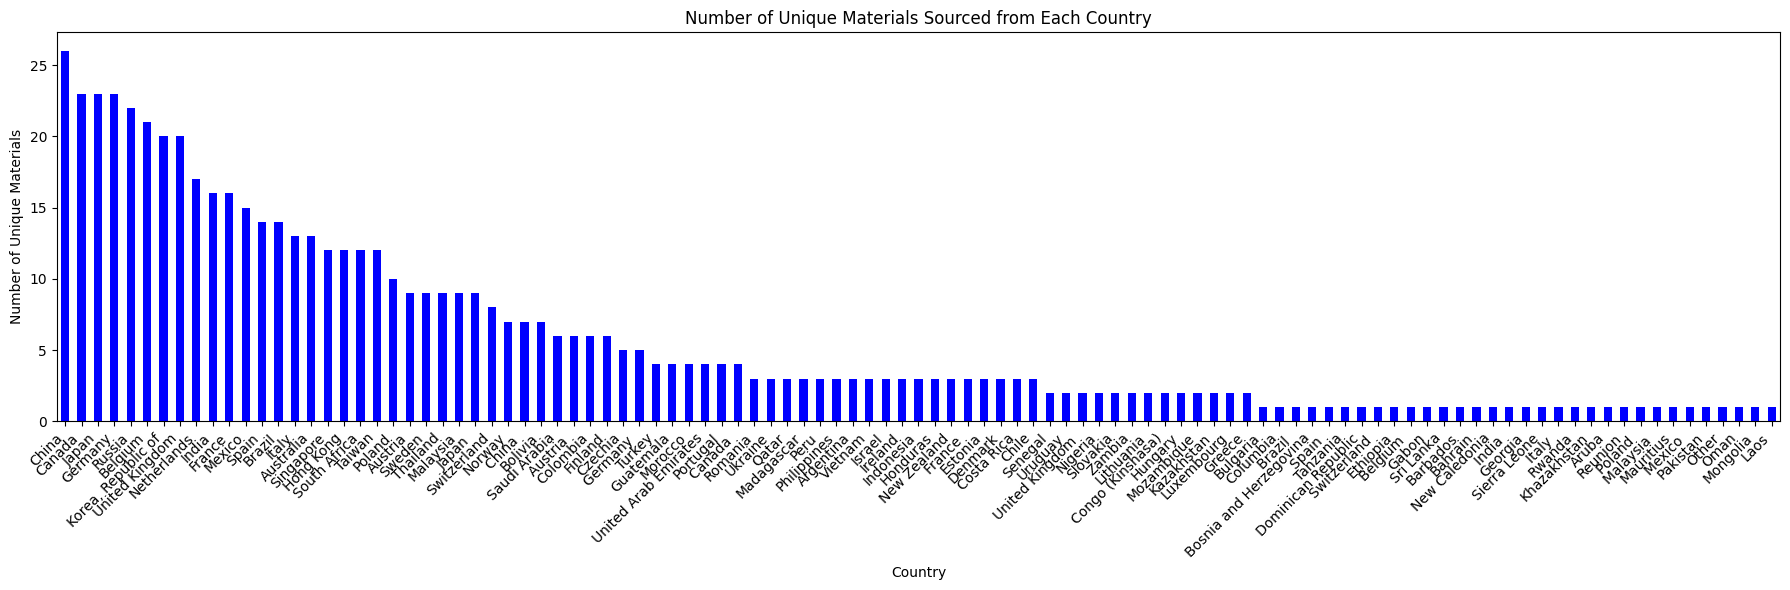

In [17]:
# The number of unique materials associated with each country
country_materials = df.groupby('Source(s)')['Material'].nunique()

# Plot a bar chart for source dependency
plt.figure(figsize=(18, 6))
country_materials.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Number of Unique Materials Sourced from Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique Materials')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Define classifications of countries
allies = {'Argentina', 'Australia', 'Austria', 'Belgium', 'Canada', 'France', 'Germany', 'Israel', 'Japan', 'Mexico', 'Netherlands', 'Norway', 'Korea, Republic of', 'Sweden', 'Taiwan', 'United Kingdom'}
competitors = {'China', 'Russia','Iran', 'North Korea'}
neutral = set(df['Source(s)']) - allies - competitors

# Function to classify each country
def classify_country(country):
    if country in allies:
        return 'Ally'
    elif country in competitors:
        return 'Competitor'
    else:
        return 'Neutral'

# Add classification to the dataframe
df['Classification'] = df['Source(s)'].apply(classify_country)

df.head(10)

,Material,Source(s),Classification
0,Alluminum,Argentina,Ally
1,Alluminum,Australia,Ally
2,Alluminum,Austria,Ally
3,Alluminum,Bahrain,Neutral
4,Alluminum,Belgium,Ally
5,Alluminum,Brazil,Neutral
6,Alluminum,Canada,Ally
7,Alluminum,Chile,Neutral
8,Alluminum,China,Competitor
9,Alluminum,Colombia,Neutral


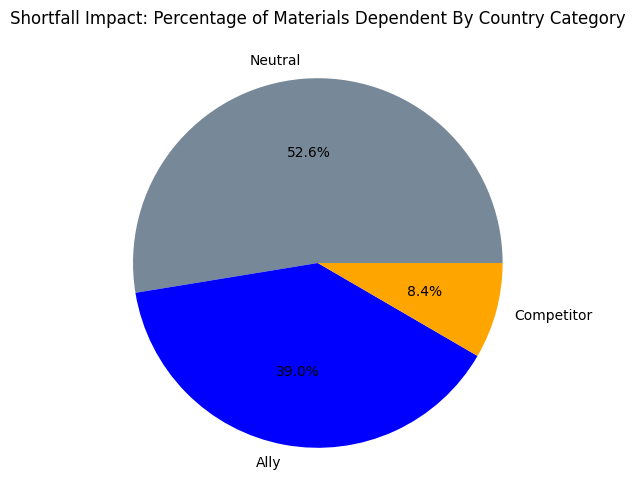

In [19]:
# Plot the source dependency chart
classification_counts = df['Classification'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', colors=['lightslategrey', 'blue', 'orange'])
ax.set_title('Shortfall Impact: Percentage of Materials Dependent By Country Category')
plt.show()

# Represent The Distribution on Global Map

In [21]:
# Recreating the classification data for visualization
country_classification = df[['Source(s)', 'Classification']].drop_duplicates()
country_classification_map = country_classification.rename(columns={'Source(s)': 'Country'})

# Using Plotly Express to visualize the dependency map
fig = px.choropleth(
    country_classification_map,
    locations='Country',
    locationmode='country names',
    color='Classification',
    title='Dependency Map by Source Country Classification',
    color_discrete_map={'Ally': 'blue', 'Competitor': 'orange', 'Neutral': 'grey'},
)

fig.show()


# **Thank you**